<h1>Teoría Espacial del voto<h1>
    
Un parrafo.
    
Otro parrafo.
    

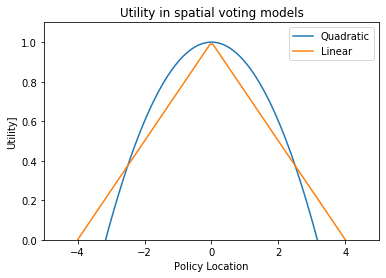

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import exp

#Import Data from april 2015 CEP Survey
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/Encuesta%20CEP%2073%20Abril%202015.csv")


#Utility Curves
# norm.util <- function(x){ return(15*exp(-0.25*(0-x)^2))}
# quad.util <- function(x){ return(15+15*(-0.25*(0-x)^2))}
# lin.util <- function(x){ return(5*-abs(x)+15)}
# plot(c(-3,3), c(0,20), type="n", bty="n", xlab="Policy Location", ylab="Utility", cex.lab=1.2)
x = np.linspace(-4,4,100)
y = 1+1*(-0.1*(0-x)**2)
z = 1*-abs(x/4)+1
plt.plot(x,y,label='Quadratic')
plt.plot(x,z,label='Linear')
plt.ylim(0, 1.1)
plt.xlim(-5,5)
plt.xlabel('Policy Location')
plt.ylabel('Utility]')
plt.title("Fig 1. Utility in spatial voting models")
plt.legend(loc='upper right')


plt.show()



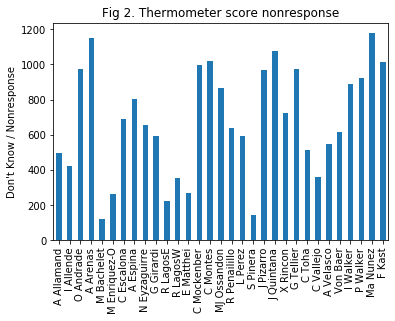

In [197]:
#Import Data from april 2015 CEP Survey
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/Encuesta%20CEP%2073%20Abril%202015.csv")

#Rename T Score Columns
cep73=cep73.rename(columns={"MB_P19_A":"A Allamand","MB_P19_B":"I Allende","MB_P19_C":"O Andrade","MB_P19_D":"A Arenas","MB_P19_E":"M Bachelet",
         "MB_P19_F":"M Enriquez-O","MB_P19_G":"C Escalona","MB_P19_H":"A Espina","MB_P19_I":"N Eyzaguirre","MB_P19_J":"G Girardi","MB_P19_K":"R LagosE", 
         "MB_P19_L":"R LagosW","MB_P19_M":"E Matthei","MB_P19_N":"C Mockenber","MB_P19_O":"C Montes","MB_P19_P":"MJ Ossandon","MB_P19_Q":"R Penailillo", 
         "MB_P19_R":"L Perez","MB_P19_S":"S Pinera","MB_P19_T":"J Pizarro","MB_P19_U":"J Quintana","MB_P19_V":"X Rincon","MB_P19_W":"G Tellier","MB_P19_X":"C Toha", 
         "MB_P19_Y":"C Vallejo","MB_P19_Z":"A Velasco","MB_P19_AA":"Von Baer","MB_P19_BB":"I Walker", "MB_P19_CC":"P Walker","MB_P19_DD":"Ma Nunez","MB_P19_EE":"F Kast"})


#Thermometer Scores
T = cep73.iloc[:,34:65]
T[T>5]=np.nan

#Plot missing values
T.isna().sum().plot(kind="bar")
plt.xlabel("")
plt.ylabel("Don't Know / Nonresponse")
plt.title("Fig 2. Thermometer score nonresponse")
plt.xticks(rotation=90)
plt.show()



In [186]:
#import scikit-learn as sklearn
#sklearn.manifold.smacof(dissimilarities, *, metric=True, n_components=2, init=None, n_init=8, n_jobs=None, max_iter=300, verbose=0, eps=0.001, random_state=None, return_n_iter=False)[source]